In [ ]:
# Importing Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('/content/Dataset-Unicauca-Version2-87Atts.csv')

In [ ]:
df.shape

(1048575, 87)

In [ ]:
df.head(7)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
5,172.19.1.56-10.200.7.6-50004-3128-6,10.200.7.6,3128,172.19.1.56,50004,6,26/04/201711:11:17,105069,136,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
6,192.168.72.43-10.200.7.7-55963-3128-6,192.168.72.43,55963,10.200.7.7,3128,6,26/04/201711:11:17,104443,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 87 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow.ID                      1048575 non-null  object 
 1   Source.IP                    1048575 non-null  object 
 2   Source.Port                  1048575 non-null  int64  
 3   Destination.IP               1048575 non-null  object 
 4   Destination.Port             1048575 non-null  int64  
 5   Protocol                     1048575 non-null  int64  
 6   Timestamp                    1048575 non-null  object 
 7   Flow.Duration                1048575 non-null  int64  
 8   Total.Fwd.Packets            1048575 non-null  int64  
 9   Total.Backward.Packets       1048575 non-null  int64  
 10  Total.Length.of.Fwd.Packets  1048575 non-null  int64  
 11  Total.Length.of.Bwd.Packets  1048575 non-null  float64
 12  Fwd.Packet.Length.Max        1048575 non-n

In [ ]:
df.dtypes

,0
Flow.ID,object
Source.IP,object
Source.Port,int64
Destination.IP,object
Destination.Port,int64
...,...
Idle.Max,float64
Idle.Min,float64
Label,object
L7Protocol,int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source.Port,1048575.0,3.569082e+04,2.267147e+04,0.0,3128.0,46984.0,53060.0,6.553400e+04
Destination.Port,1048575.0,1.291848e+04,2.116656e+04,0.0,443.0,3128.0,3128.0,6.553400e+04
Protocol,1048575.0,6.005119e+00,3.248193e-01,0.0,6.0,6.0,6.0,1.700000e+01
Flow.Duration,1048575.0,2.112849e+07,3.711712e+07,1.0,564.0,313310.0,19923955.5,1.200000e+08
Total.Fwd.Packets,1048575.0,5.465246e+01,9.892436e+02,1.0,2.0,5.0,15.0,3.286950e+05
...,...,...,...,...,...,...,...,...
Idle.Mean,1048575.0,7.093360e+06,1.598250e+07,0.0,0.0,0.0,0.0,1.200000e+08
Idle.Std,1048575.0,1.115743e+06,4.398582e+06,0.0,0.0,0.0,0.0,7.516046e+07
Idle.Max,1048575.0,8.076663e+06,1.764365e+07,0.0,0.0,0.0,0.0,1.200000e+08
Idle.Min,1048575.0,6.058889e+06,1.497405e+07,0.0,0.0,0.0,0.0,1.200000e+08


In [ ]:
df.duplicated().sum()

2514

In [ ]:
df.nunique()

,0
Flow.ID,442483
Source.IP,2893
Source.Port,38198
Destination.IP,11488
Destination.Port,25254
...,...
Idle.Max,189909
Idle.Min,207247
Label,1
L7Protocol,60


In [ ]:
columns_to_count=df.columns
for column in columns_to_count:
    print(df[column].value_counts())
    print('-----------------------')

Flow.ID
192.168.10.58-10.200.7.4-50555-3128-6     199
192.168.180.14-10.200.7.8-52792-3128-6    192
192.168.180.14-10.200.7.5-51613-3128-6    176
192.168.180.16-10.200.7.7-55146-3128-6    127
172.16.255.183-10.200.7.4-53-52931-17     115
                                         ... 
179.1.4.230-10.200.7.199-443-45526-6        1
190.90.221.34-10.200.7.199-80-36290-6       1
192.168.42.72-10.200.7.7-63924-3128-6       1
192.168.42.72-10.200.7.7-63929-3128-6       1
192.168.180.14-10.200.7.5-34478-3128-6      1
Name: count, Length: 442483, dtype: int64
-----------------------
Source.IP
10.200.7.217      93634
10.200.7.218      79628
10.200.7.199      61417
10.200.7.195      60937
10.200.7.194      59448
                  ...  
34.204.127.166        1
38.106.10.133         1
213.171.205.88        1
208.92.55.74          1
192.168.127.59        1
Name: count, Length: 2893, dtype: int64
-----------------------
Source.Port
3128     220283
443       36293
80         4040
0           506
49472 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()


object_str_cols = df.select_dtypes(include=['object']).columns


# Apply label encoding to these columns
for col in object_str_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the updated data types to confirm encoding
object_info = df.info()


(object_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 87 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow.ID                      1048575 non-null  int64  
 1   Source.IP                    1048575 non-null  int64  
 2   Source.Port                  1048575 non-null  int64  
 3   Destination.IP               1048575 non-null  int64  
 4   Destination.Port             1048575 non-null  int64  
 5   Protocol                     1048575 non-null  int64  
 6   Timestamp                    1048575 non-null  int64  
 7   Flow.Duration                1048575 non-null  int64  
 8   Total.Fwd.Packets            1048575 non-null  int64  
 9   Total.Backward.Packets       1048575 non-null  int64  
 10  Total.Length.of.Fwd.Packets  1048575 non-null  int64  
 11  Total.Length.of.Bwd.Packets  1048575 non-null  float64
 12  Fwd.Packet.Length.Max        1048575 non-n

In [ ]:
corr_matrix=df.corr()
corr_matrix

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
Flow.ID,1.000000,0.370161,-0.096088,-0.252922,0.119107,-0.008127,-0.018494,-0.018598,0.002059,0.001444,...,-0.011751,-0.028199,-0.030642,0.012806,0.017282,0.013277,0.007764,NaN,0.019460,-0.116642
Source.IP,0.370161,1.000000,0.134280,-0.653622,-0.140753,-0.009855,-0.062627,0.199374,0.004592,0.011283,...,0.025407,0.008143,-0.016090,0.180959,0.099125,0.182660,0.162958,NaN,0.386882,-0.099219
Source.Port,-0.096088,0.134280,1.000000,-0.086449,-0.769493,0.026069,-0.044533,0.051941,-0.011590,0.013917,...,0.008209,0.013294,0.017287,0.069584,0.047339,0.070559,0.063377,NaN,0.429562,0.197442
Destination.IP,-0.252922,-0.653622,-0.086449,1.000000,0.070311,0.004182,0.061540,-0.144529,-0.008085,-0.013477,...,-0.034198,-0.028168,-0.005542,-0.150630,-0.097223,-0.155085,-0.132677,NaN,-0.323278,0.131246
Destination.Port,0.119107,-0.140753,-0.769493,0.070311,1.000000,-0.004621,0.026882,0.012074,0.015918,-0.011237,...,0.003260,-0.006286,-0.019375,-0.010051,-0.011081,-0.009816,-0.010633,NaN,-0.447066,-0.201038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle.Max,0.013277,0.182660,0.070559,-0.155085,-0.009816,-0.002502,0.000602,0.801117,0.001731,0.004606,...,0.167480,0.168965,0.078492,0.978849,0.537829,1.000000,0.906427,NaN,0.186590,-0.035011
Idle.Min,0.007764,0.162958,0.063377,-0.132677,-0.010633,-0.003808,-0.003207,0.669907,-0.002646,0.000010,...,0.068449,0.098313,0.086703,0.970249,0.141145,0.906427,1.000000,NaN,0.163762,-0.034893
Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L7Protocol,0.019460,0.386882,0.429562,-0.323278,-0.447066,-0.018084,-0.024100,0.216914,0.011387,0.016252,...,0.052017,0.057806,0.028683,0.180985,0.105989,0.186590,0.163762,NaN,1.000000,0.072824


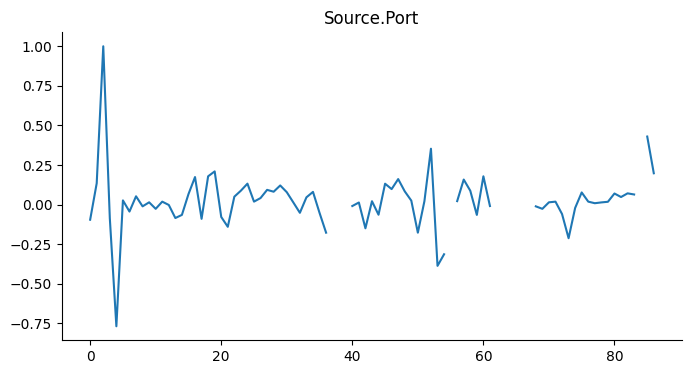

In [ ]:
from matplotlib import pyplot as plt
_df_14['Source.Port'].plot(kind='line', figsize=(8, 4), title='Source.Port')
plt.gca().spines[['top', 'right']].set_visible(False)

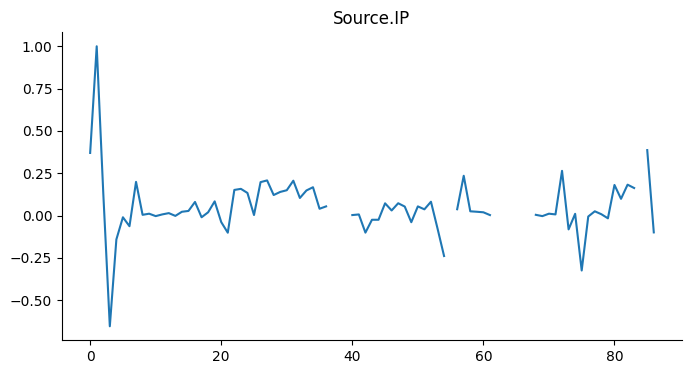

In [ ]:
from matplotlib import pyplot as plt
_df_13['Source.IP'].plot(kind='line', figsize=(8, 4), title='Source.IP')
plt.gca().spines[['top', 'right']].set_visible(False)

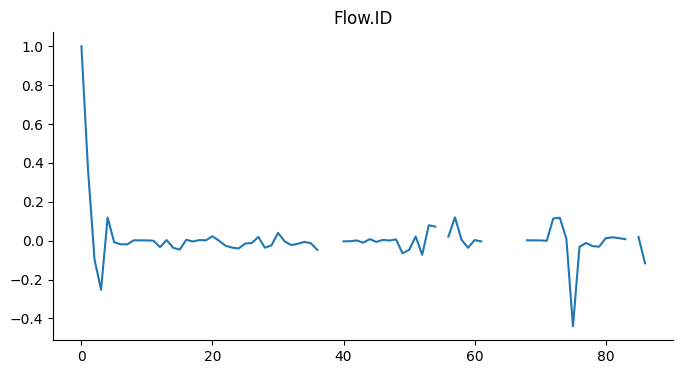

In [ ]:
from matplotlib import pyplot as plt
_df_12['Flow.ID'].plot(kind='line', figsize=(8, 4), title='Flow.ID')
plt.gca().spines[['top', 'right']].set_visible(False)

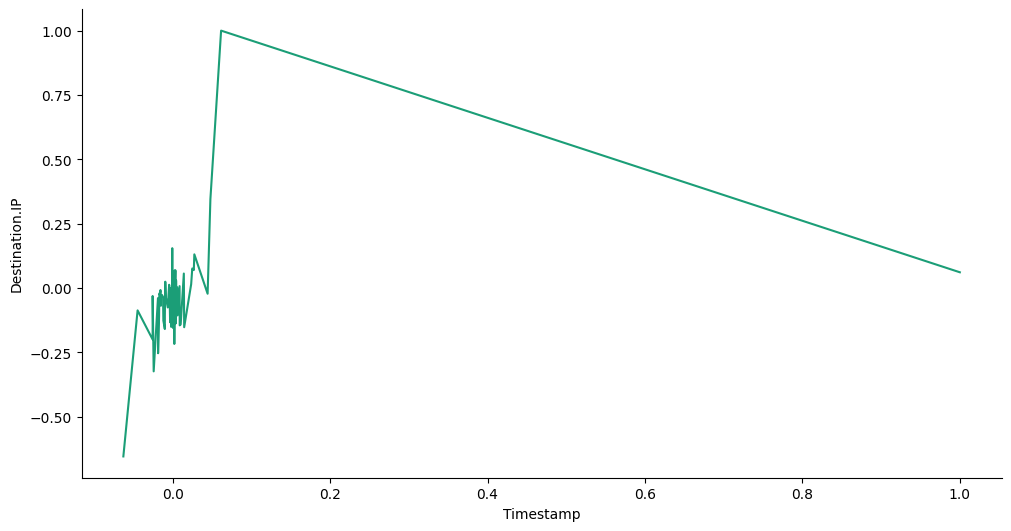

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Destination.IP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Destination.IP')

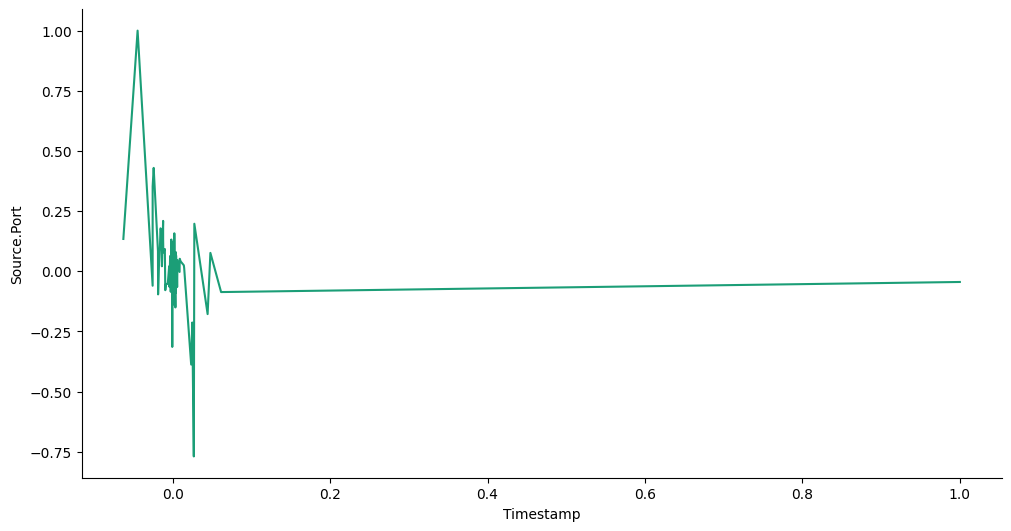

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Source.Port']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Source.Port')

In [ ]:
df.head(7)

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
5,172.19.1.56-10.200.7.6-50004-3128-6,10.200.7.6,3128,172.19.1.56,50004,6,26/04/201711:11:17,105069,136,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
6,192.168.72.43-10.200.7.7-55963-3128-6,192.168.72.43,55963,10.200.7.7,3128,6,26/04/201711:11:17,104443,5,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 87 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow.ID                      1048575 non-null  object 
 1   Source.IP                    1048575 non-null  object 
 2   Source.Port                  1048575 non-null  int64  
 3   Destination.IP               1048575 non-null  object 
 4   Destination.Port             1048575 non-null  int64  
 5   Protocol                     1048575 non-null  int64  
 6   Timestamp                    1048575 non-null  object 
 7   Flow.Duration                1048575 non-null  int64  
 8   Total.Fwd.Packets            1048575 non-null  int64  
 9   Total.Backward.Packets       1048575 non-null  int64  
 10  Total.Length.of.Fwd.Packets  1048575 non-null  int64  
 11  Total.Length.of.Bwd.Packets  1048575 non-null  float64
 12  Fwd.Packet.Length.Max        1048575 non-n

In [ ]:
df.dtypes

,0
Flow.ID,object
Source.IP,object
Source.Port,int64
Destination.IP,object
Destination.Port,int64
...,...
Idle.Max,float64
Idle.Min,float64
Label,object
L7Protocol,int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source.Port,1048575.0,3.569082e+04,2.267147e+04,0.0,3128.0,46984.0,53060.0,6.553400e+04
Destination.Port,1048575.0,1.291848e+04,2.116656e+04,0.0,443.0,3128.0,3128.0,6.553400e+04
Protocol,1048575.0,6.005119e+00,3.248193e-01,0.0,6.0,6.0,6.0,1.700000e+01
Flow.Duration,1048575.0,2.112849e+07,3.711712e+07,1.0,564.0,313310.0,19923955.5,1.200000e+08
Total.Fwd.Packets,1048575.0,5.465246e+01,9.892436e+02,1.0,2.0,5.0,15.0,3.286950e+05
...,...,...,...,...,...,...,...,...
Idle.Mean,1048575.0,7.093360e+06,1.598250e+07,0.0,0.0,0.0,0.0,1.200000e+08
Idle.Std,1048575.0,1.115743e+06,4.398582e+06,0.0,0.0,0.0,0.0,7.516046e+07
Idle.Max,1048575.0,8.076663e+06,1.764365e+07,0.0,0.0,0.0,0.0,1.200000e+08
Idle.Min,1048575.0,6.058889e+06,1.497405e+07,0.0,0.0,0.0,0.0,1.200000e+08


In [ ]:
df.duplicated().sum()

2514

In [ ]:
df.nunique()

,0
Flow.ID,442483
Source.IP,2893
Source.Port,38198
Destination.IP,11488
Destination.Port,25254
...,...
Idle.Max,189909
Idle.Min,207247
Label,1
L7Protocol,60


In [ ]:
columns_to_count=df.columns
for column in columns_to_count:
    print(df[column].value_counts())
    print('-----------------------')

Flow.ID
192.168.10.58-10.200.7.4-50555-3128-6     199
192.168.180.14-10.200.7.8-52792-3128-6    192
192.168.180.14-10.200.7.5-51613-3128-6    176
192.168.180.16-10.200.7.7-55146-3128-6    127
172.16.255.183-10.200.7.4-53-52931-17     115
                                         ... 
179.1.4.230-10.200.7.199-443-45526-6        1
190.90.221.34-10.200.7.199-80-36290-6       1
192.168.42.72-10.200.7.7-63924-3128-6       1
192.168.42.72-10.200.7.7-63929-3128-6       1
192.168.180.14-10.200.7.5-34478-3128-6      1
Name: count, Length: 442483, dtype: int64
-----------------------
Source.IP
10.200.7.217      93634
10.200.7.218      79628
10.200.7.199      61417
10.200.7.195      60937
10.200.7.194      59448
                  ...  
34.204.127.166        1
38.106.10.133         1
213.171.205.88        1
208.92.55.74          1
192.168.127.59        1
Name: count, Length: 2893, dtype: int64
-----------------------
Source.Port
3128     220283
443       36293
80         4040
0           506
49472 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()


object_str_cols = df.select_dtypes(include=['object']).columns


# Apply label encoding to these columns
for col in object_str_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the updated data types to confirm encoding
object_info = df.info()


(object_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 87 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Flow.ID                      1048575 non-null  int64  
 1   Source.IP                    1048575 non-null  int64  
 2   Source.Port                  1048575 non-null  int64  
 3   Destination.IP               1048575 non-null  int64  
 4   Destination.Port             1048575 non-null  int64  
 5   Protocol                     1048575 non-null  int64  
 6   Timestamp                    1048575 non-null  int64  
 7   Flow.Duration                1048575 non-null  int64  
 8   Total.Fwd.Packets            1048575 non-null  int64  
 9   Total.Backward.Packets       1048575 non-null  int64  
 10  Total.Length.of.Fwd.Packets  1048575 non-null  int64  
 11  Total.Length.of.Bwd.Packets  1048575 non-null  float64
 12  Fwd.Packet.Length.Max        1048575 non-n

In [ ]:
corr_matrix=df.corr()
corr_matrix

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
Flow.ID,1.000000,0.370161,-0.096088,-0.252922,0.119107,-0.008127,-0.018494,-0.018598,0.002059,0.001444,...,-0.011751,-0.028199,-0.030642,0.012806,0.017282,0.013277,0.007764,NaN,0.019460,-0.116642
Source.IP,0.370161,1.000000,0.134280,-0.653622,-0.140753,-0.009855,-0.062627,0.199374,0.004592,0.011283,...,0.025407,0.008143,-0.016090,0.180959,0.099125,0.182660,0.162958,NaN,0.386882,-0.099219
Source.Port,-0.096088,0.134280,1.000000,-0.086449,-0.769493,0.026069,-0.044533,0.051941,-0.011590,0.013917,...,0.008209,0.013294,0.017287,0.069584,0.047339,0.070559,0.063377,NaN,0.429562,0.197442
Destination.IP,-0.252922,-0.653622,-0.086449,1.000000,0.070311,0.004182,0.061540,-0.144529,-0.008085,-0.013477,...,-0.034198,-0.028168,-0.005542,-0.150630,-0.097223,-0.155085,-0.132677,NaN,-0.323278,0.131246
Destination.Port,0.119107,-0.140753,-0.769493,0.070311,1.000000,-0.004621,0.026882,0.012074,0.015918,-0.011237,...,0.003260,-0.006286,-0.019375,-0.010051,-0.011081,-0.009816,-0.010633,NaN,-0.447066,-0.201038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Idle.Max,0.013277,0.182660,0.070559,-0.155085,-0.009816,-0.002502,0.000602,0.801117,0.001731,0.004606,...,0.167480,0.168965,0.078492,0.978849,0.537829,1.000000,0.906427,NaN,0.186590,-0.035011
Idle.Min,0.007764,0.162958,0.063377,-0.132677,-0.010633,-0.003808,-0.003207,0.669907,-0.002646,0.000010,...,0.068449,0.098313,0.086703,0.970249,0.141145,0.906427,1.000000,NaN,0.163762,-0.034893
Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
L7Protocol,0.019460,0.386882,0.429562,-0.323278,-0.447066,-0.018084,-0.024100,0.216914,0.011387,0.016252,...,0.052017,0.057806,0.028683,0.180985,0.105989,0.186590,0.163762,NaN,1.000000,0.072824


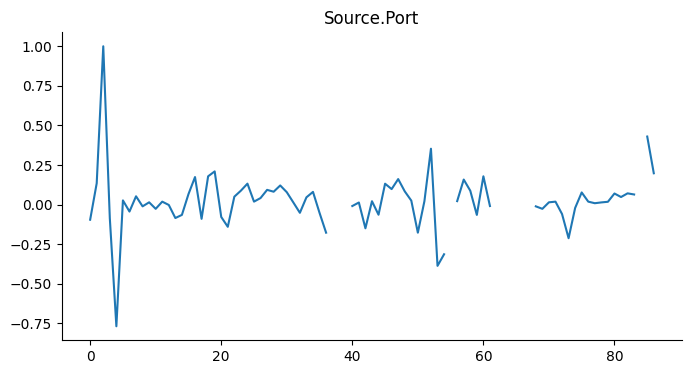

In [ ]:
from matplotlib import pyplot as plt
_df_14['Source.Port'].plot(kind='line', figsize=(8, 4), title='Source.Port')
plt.gca().spines[['top', 'right']].set_visible(False)

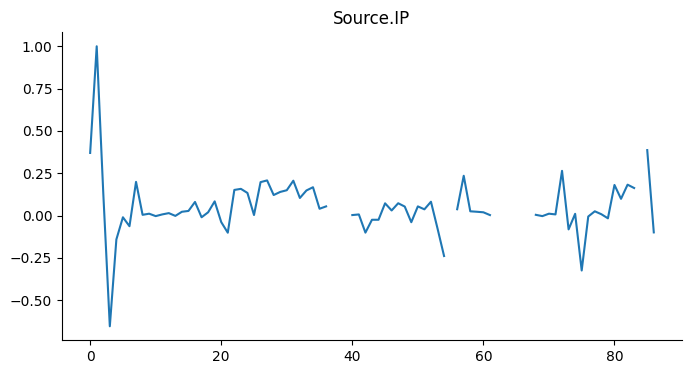

In [ ]:
from matplotlib import pyplot as plt
_df_13['Source.IP'].plot(kind='line', figsize=(8, 4), title='Source.IP')
plt.gca().spines[['top', 'right']].set_visible(False)

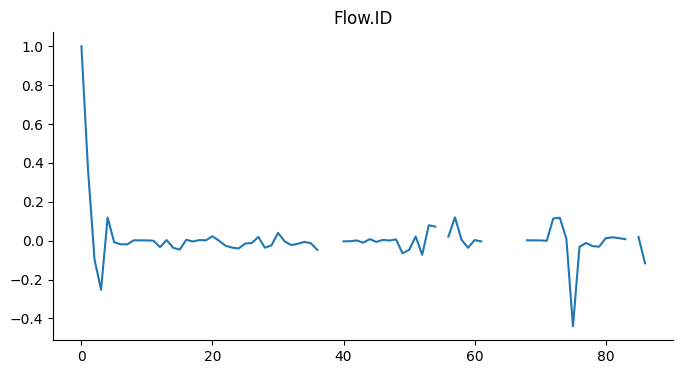

In [ ]:
from matplotlib import pyplot as plt
_df_12['Flow.ID'].plot(kind='line', figsize=(8, 4), title='Flow.ID')
plt.gca().spines[['top', 'right']].set_visible(False)

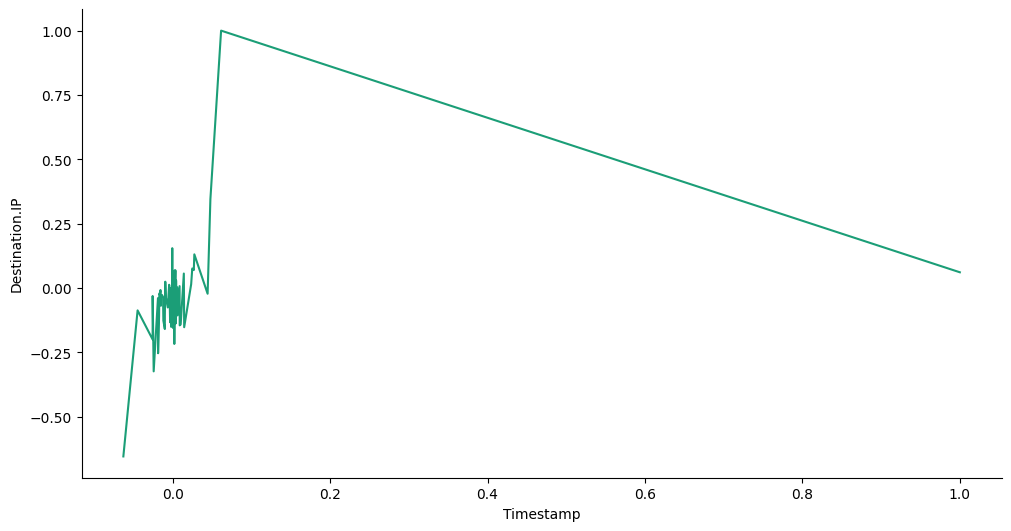

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Destination.IP']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Destination.IP')

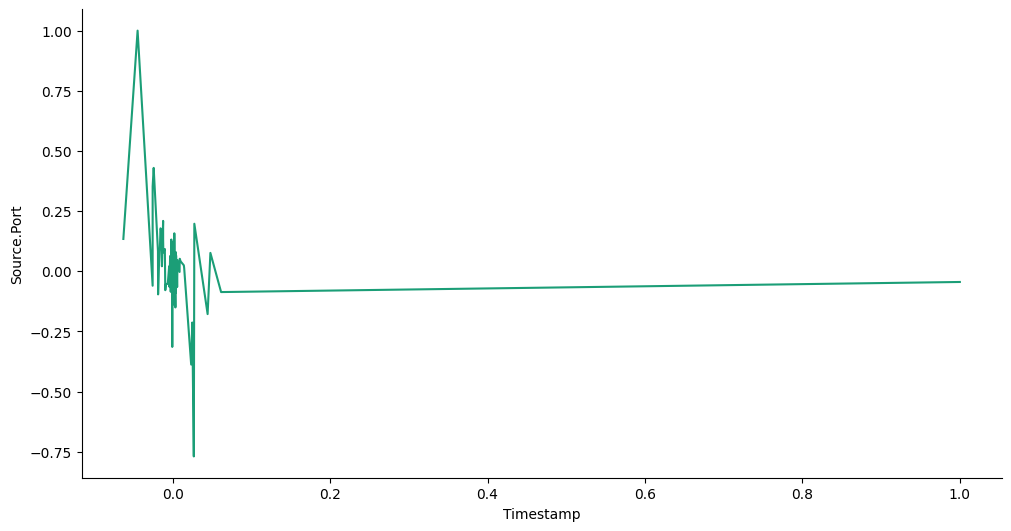

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Source.Port']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Source.Port')